<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Бахтияр, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 
 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



# Линейные модели в машинном обучении

В этом проекте мы проведем анализ данных ассоциацией пастбищ «ЭкоФерма» и разработаем модель машинного обучения, которая поможет молочного хозяйства «Вольный луг» управлять рисками и принимать объективное решение о покупке.

Цель исследования: создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молмолоко должно быть вкусным.

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Ход исследования:**

**Шаг1: Загрузка данных**
Сначала откроем файлы с данными и изучим их содержимое, чтобы понять структуру данных и выявить возможные проблемы, требующие предварительной обработки.

**Шаг2: Предобработка данных**
На этом этапе проведем ряд подготовительных работ с данными:

- обработка пропусков
- работа с дубликатами
- работа с типами данных

**Шаг3: Исследовательский анализ данных**
Проведем статистический анализ всех признаков. Изучим каждый признак графическим методом. Проверим выбросы и аномалии в распределении количественных признаков.

**Шаг4: Корреляционный анализ признаков в датасете ferma_main.csv**
Изучим заимосвязь между признаками методами
- корреляционного анализа.
- графически (scatterplot)
И ответим на вопросы:
- Какой тип взаимосвязи между целевым и входными признаками?
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
- Наблюдается ли мультиколлинеарность между входными признаками?

**Шаг5: Обучение модели регрессии**
На этом этапе построим регрессионную модель для прогноза удой коров. 

**Шаг6: Обучение модели классификации**
На этом этапе построим логит модель для прогноза вкуса молока.

**Шаг7: Итоговый вывод**
Подготовим итоговую таблицу данных с коровами, покупку которых рассматривает фермер, дадим рекомендации для покупки коров с минимальным риском.

А также, мы сделаем выводы по линейной и логистической моделям.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Отлично по описанию. Цели, задачи и план ясны.
</div>
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score
)
from scipy import stats as st
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
import io
from IPython.display import display, HTML

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, confusion_matrix`
    
А если через запятую будет больше трех-четырех позиций (а длина строки больше 90 символов), в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score
)`
    
        
</div>



## 1. Загрузка данных

In [ ]:
ferma_main = pd.read_csv('/data/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/data/ferma_dad.csv', sep=';', decimal=',')
cow_buy = pd.read_csv('/data/cow_buy.csv', sep=';', decimal=',')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что указываешь разделитель с запятой для чисел.
</div> 
   

In [3]:
display(ferma_main.head(10))
print(ferma_main.info())
print('------------------------------------------------------')

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [4]:
display(ferma_dad.head(10))
print(ferma_dad.info())
print('------------------------------------------------------')

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
------------------------------------------------------


In [5]:
display(cow_buy.head(10))
cow_buy.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Заказчик предоставил для анализа 3 файла:
- ferma_main - содержит данные о стаде фермера на текущий момент
- ferma_dad - хранит имя папы каждой коровы в стаде фермера
- cow_buy - это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

В файле ferma_main можем видеть 2 целевых признака - удой, кг и вкус молока, а также 9 остальных признаков. Данную таблицу мы будем использовать для построения моделей. Описание таблицы показала, что в таблице всего 634 строк и нет пропусков. Но есть некорректные типы данных, которые нужно исправить: признаки СПО, Жирность,% и Белок,% заполнены как object, хотя должны быть int64. Также, стоит обратить внимание, что размерности количественных данных сыльно отличаются друг от друга: есть данные в килограммах, в граммах и процентах. Для использования такие данные нужно будет масштабировать.

В файле ferma_dad хранится признак имена отцов коров, который можно использовать для улучшения модели. В таблице 629 строк, что отцы у 5 коров неопределены или в таблицы 5 дублируюзихся строк.

В таблице cow_buy нет целевых признаков, что означает мы должны предсказать целевые признаки для заказчика по признакам, которые хранятся в таблице. Всего таблице 20 строк и 7 признаков. Также как и в таблице ferma_main, в таблице нет пропусков, но есть некорректные типы данных.

Также, во всех таблицах нужно привести наименования столбцов в единый формат: названия написаны на кирилице длинными словами, неудобно в коде работать с такими наименованиями, также одинаковые признаки в разных таблицах называются по разному.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно по описанию, проблемы в данных обозначены корректно.
</div> 
   

## 2. Предобработка данных

Как обнаружили предыдущем шаге анализа данных, в таблицах нет пропусков, поэтому можем пропустить эту часть предобработки данных. Первым делом приведем наименования столбцов в единый формат. После проверим дубликаты и обработам типы данных. 

#### 2.1 Обработка названия столбцов

In [6]:
# Переименование столбцов
ferma_main = ferma_main.rename(columns={
    'Удой, кг': 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar-protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
})

ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'father_name'})

cow_buy = cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'fat_content',
    'Текущий_уровень_белок,%': 'protein',
    'Возраст': 'age'    
})

# Проверка новых названий столбцов
print(ferma_main.info())
print('------------------------------------------------------')
print(ferma_dad.info())
print('------------------------------------------------------')
print(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   crude_protein        634 non-null    int64  
 4   sugar-protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   father_breed         634 non-null    object 
 8   fat_content          634 non-null    float64
 9   protein              634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628


Привели все наименования столбцов в единый стандарт snake_case для удобства работы в коде.

#### 2.2 Удаление дубликатов

In [7]:
# Проверка дубликатов
print('ferma_main:', ferma_main.duplicated().sum())
print('ferma_dad:', ferma_dad.duplicated().sum())
print('cow_buy:', cow_buy.duplicated().sum())

ferma_main: 5
ferma_dad: 0
cow_buy: 4


In [8]:
# Удаление дубликатов
ferma_main = ferma_main.drop_duplicates()

# Проверка удаления дубликатов
print('ferma_main:', ferma_main.duplicated().sum())

ferma_main: 0


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Предположу, что в таблице коров на покупку у нас все-таки разные коровы. Там мало признаков, категорий тоже немного - вероятность повторов ненулевая.
    
В случае сомнения нам выгоднее оставить здесь дубли: легче будет в дальнейшем их удалить, чем восстановить. Эта таблица в обучении моделей не участвует, так что дубли не критичны.
       
</div> 

Итак в таблице ferma_main оказались 5 строк дубликатов, а в таблице cow_buy 4. В таблице ferma_dad дубликатов нет. Мы удалили повторяющиеся строки в таблице ferma main, чтоб они не исказили анализ данных. Таким образом, количество строк в таблицах ferma_main и ferma_dad уравнялись и для каждой коровы есть данные по отцам.

В таблице cow_buy недостаточно признаков, чтобы судить о дубликатах, возможно это разные коровы. К тому же, это таблица в обучении моделей не участвует, так что дубли не критичны.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Закомментированный код в проекте я бы не оставлял. Рекомендую либо убрать, либо перенести в самый низ, в самые последние ячейки проекта.
       
</div> 

## 3. Исследовательский анализ данных

#### 3.1 Количественные признаки

In [9]:
# Функция для вывода графиков числовых признаков
def graph_numeric(df, col, bins=30):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=bins, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()
    print(df[col].describe())

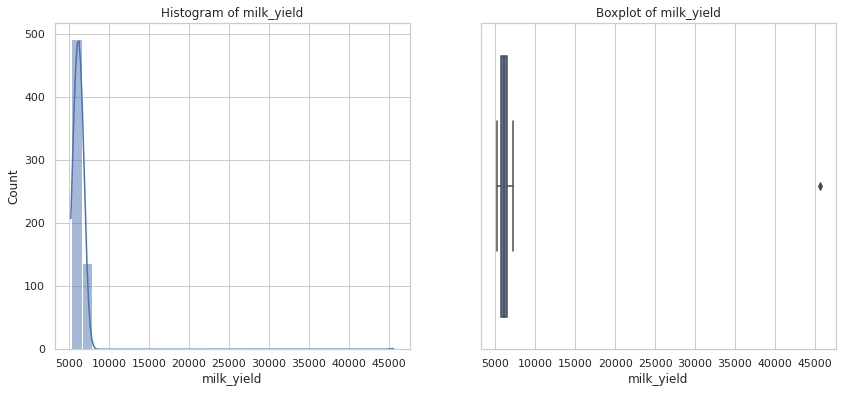

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64


In [10]:
graph_numeric(ferma_main, 'milk_yield')

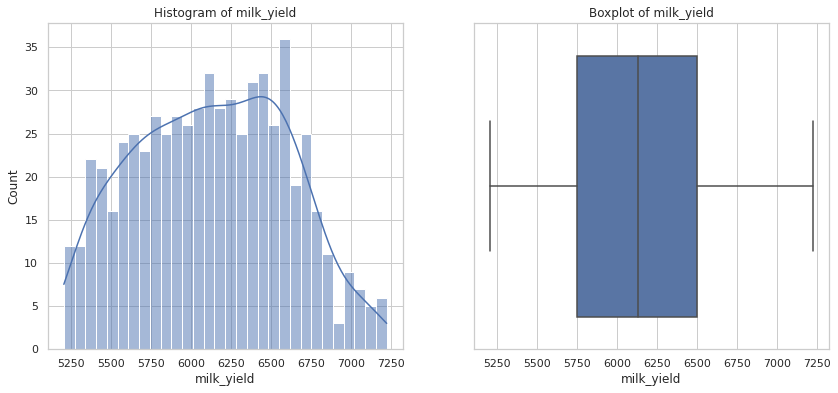

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64


In [11]:
# Удаление выброса
ferma_main = ferma_main[ferma_main['milk_yield'] < 10000]

# Проверка удаления выбросов
graph_numeric(ferma_main, 'milk_yield')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Отлично 
</div>  


Первым делом рассмотрим распределение основного целового признака - удой - масса молока, которую корова даёт в год (в килограммах). Был замечен выброс справа (значение значительно превышающее 7250 кг). Этот выброс был удалён для более точного анализа данных.
- Среднее значение удоя составляет около 6126 кг. Медиана (50-й перцентиль) практически совпадает со средним и равна 6132.5 кг. Это говорит о том, что распределение данных достаточно симметричное.
- Стандартное отклонение равно 475.86 кг, что указывает на умеренный разброс значений вокруг среднего. Разброс значений (интерквартильный размах) между 25-м и 75-м перцентилями составляет 5749.75 кг и 6501 кг соответственно, что также видно по боксплоту. Это подтверждает, что основная масса значений сосредоточена в диапазоне 5750–6500 кг.
- Гистограмма показывает нормальное распределение, однако с некоторым смещением вправо. Правый "хвост" распределения более вытянут, что также видно на графике плотности, который показывает снижение частот в диапазоне от 6750 кг до 7250 кг.

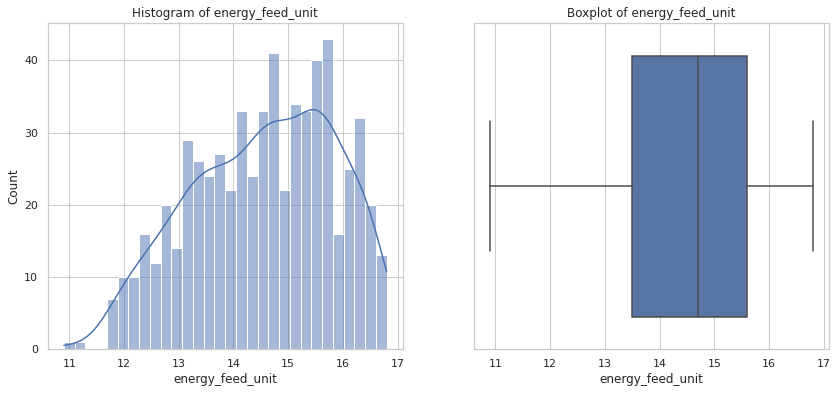

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64


In [12]:
graph_numeric(ferma_main, 'energy_feed_unit')

Энергетическая кормовая единица (ЭКЕ) имеет распределение с лёгким смещением влево, что свидетельствует о большем количестве значений, сосредоточенных в верхней части диапазона (ближе к максимальному значению ЭКЕ):
- Среднее значение ЭКЕ составляет 14.55. Медиана (50-й перцентиль) равна 14.7, что указывает на небольшое смещение распределения влево.
- Стандартное отклонение равно 1.30, что говорит о достаточно умеренном разбросе значений вокруг среднего. Интерквартильный размах (разница между 25-м и 75-м перцентилями) составляет 13.5 и 15.6 соответственно. На боксплоте видно, что основная масса данных сосредоточена в пределах этих значений.
- Гистограмма показывает асимметричное распределение с левым хвостом. Значительное число наблюдений сконцентрировано в диапазоне от 14 до 16 ЭКЕ, что видно по пику на графике плотности. Левый "хвост" распределения более вытянут, что указывает на наличие меньшего числа значений с низкой ЭКЕ.
- Явных выбросов не наблюдается, так как боксплот показывает, что все значения находятся в пределах допустимых границ (межквартильный размах).

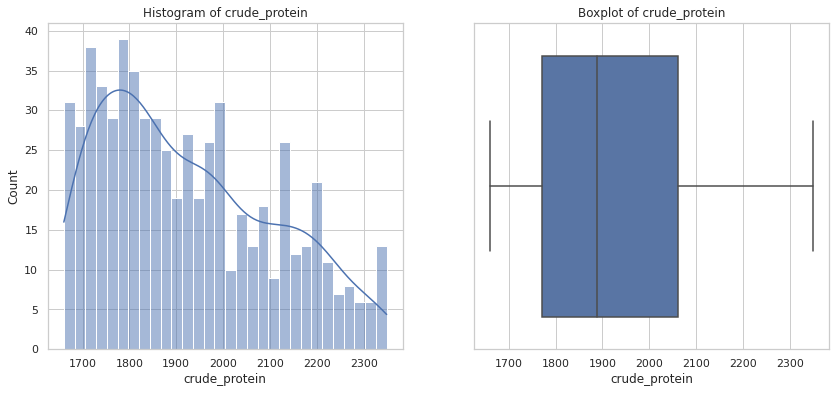

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein, dtype: float64


In [13]:
    graph_numeric(ferma_main, 'crude_protein')

Распределение содержания сырого протеина (в граммах), показывает близкое к нармальному:
- Среднее значение составляет 1923.76. Медиана (50-й перцентиль) равна 1888.00. Среднее значение выше медианы, что может указывать на наличие нескольких высоких значений, которые тянут среднее вверх.
- Стандартное отклонение равно 182.83. Данные варьируются от минимального значения 1660 до максимального 2349. Значения между 25% (1771.75) и 75% (2062.25) показывают, что большая часть данных сосредоточена в этом диапазоне.
- График немного скошен вправо (положительная асимметрия). Имеется небольшой хвост справа.
- Явных выбросов не наблюдается, так как боксплот показывает, что все значения находятся в пределах допустимых границ (межквартильный размах).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Верно по анализу, отлично, что везде комментируешь характер распередления.
</div>  


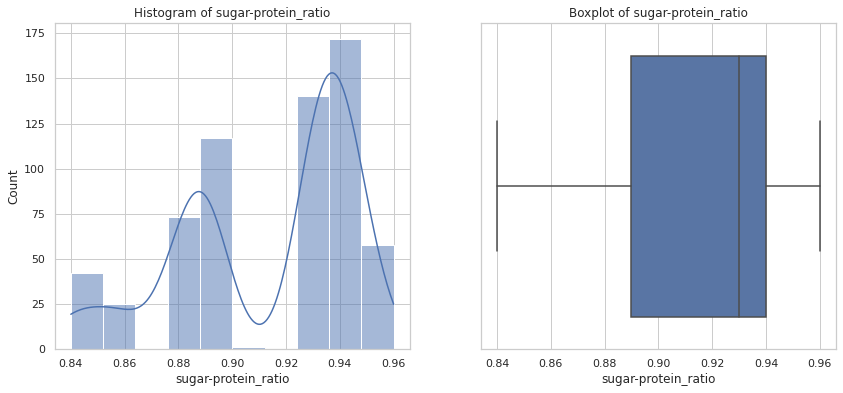

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar-protein_ratio, dtype: float64


In [14]:
graph_numeric(ferma_main, 'sugar-protein_ratio', bins=10)

По распределению сахаро-протеинового соотношения (СПО) можно харектировать таким образом:
- Среднее значение составляет 0.913. Медиана равна 0.930. Среднее значение ниже медианы, что может указывать на наличие небольшого количества низких значений, которые тянут среднее вниз.
- Стандартное отклонение равно 0.032. Данные варьируются от минимального значения 0.840 до максимального 0.960. Значения между 25% (0.890) и 75% (0.940) показывают, что большая часть данных сосредоточена в этом диапазоне.
- График немного скошен влево (отрицательная асимметрия). Хвосты распределения не сильно выражены, так как разница между минимальным и максимальным значениями незначительна.
- Явных выбросов не наблюдается, так как боксплот показывает, что все значения находятся в пределах допустимых границ (межквартильный размах).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Здесь видим промежутки, можно сказать, что распределение не похоже на нормальное.
</div>  


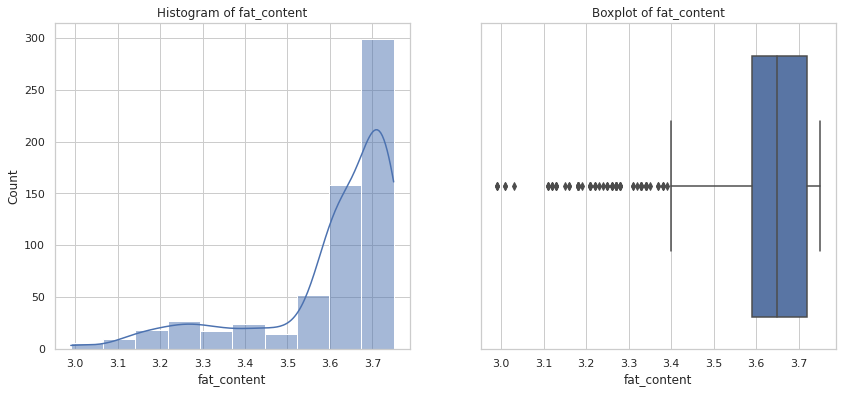

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64


In [15]:
graph_numeric(ferma_main, 'fat_content', bins=10)

По распределению жирности молока (в процентах) можно харектировать таким образом:
- Среднее значение составляет 3.6. Медиана равна 3.65. Среднее значение немного ниже медианы, что может указывать на наличие небольшого количества низких значений, которые тянут среднее вниз.
- Стандартное отклонение равно 0.168. Данные варьируются от минимального значения 2.990 до максимального 3.750. Значения между 25% (3.590) и 75% (3.720) показывают, что большая часть данных сосредоточена в этом диапазоне.
- График немного скошен влево (отрицательная асимметрия). Хвост на гистограмме слева указывает на наличие выбросов, что подтверждает наличие низких значений, влияющих на распределение.
- На боксплоте видны выбросы слева, что указывает на наличие значений, выходящих за границы усов. Это подтверждает, что в данных есть несколько низких значений, которые могут влиять на общую статистику.

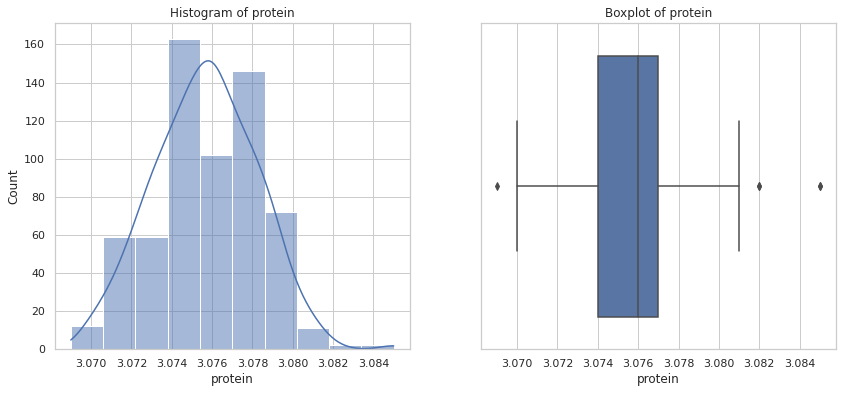

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64


In [16]:
graph_numeric(ferma_main, 'protein', bins=10)

In [17]:
# Рассчитываем квартили и межквартильный размах (IQR)
Q1 = ferma_main['protein'].quantile(0.25)
Q3 = ferma_main['protein'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, удаляя выбросы
ferma_main = ferma_main[(ferma_main['protein'] >= lower_bound) & (ferma_main['protein'] <= upper_bound)]

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
В целом можно пользоваться этим способом, но я бы лично рекомендовал, если у нас данных мало и мы не автоматизируем пока здесь предоработку, то смотреть по реалистичности данных. 
    
Особенно это касается признаков с ненормальным распределением. Там правило трех сигм не всегда работает (особенно в случае полимодальных распределений). 
    

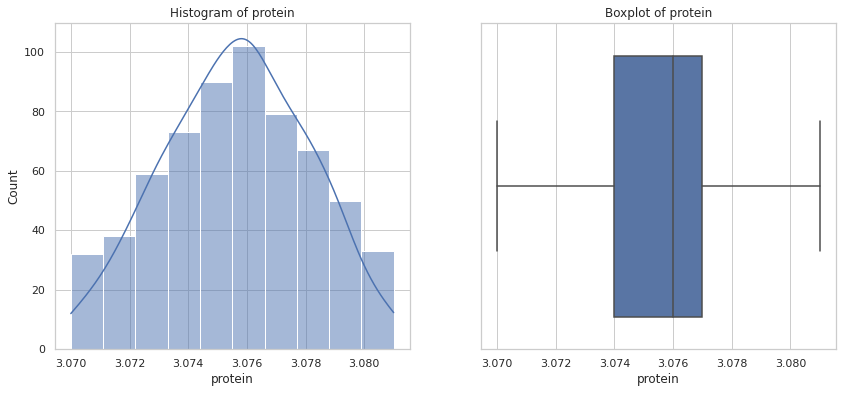

count    623.000000
mean       3.075631
std        0.002466
min        3.070000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.081000
Name: protein, dtype: float64


In [18]:
# Удаление выброса
# ferma_main = ferma_main[ferma_main['protein'] > 3.069]
# ferma_main = ferma_main[ferma_main['protein'] < 3.081]

# Проверка удаления выбросов
graph_numeric(ferma_main, 'protein', bins=10)

По распределению содержание белков в молоке (в процентах) можно харектировать таким образом:
- Среднее значение практически совпадает с медианой (3.076), что указывает на симметричное распределение данных.
- Стандартное отклонение равно 0.0026. Данные варьируются от минимального значения 3.069 до максимального 3.085. Значения между 25% (3.074) и 75% (3.077) показывают, что большая часть данных сосредоточена в этом диапазоне.
- Поскольку среднее значение практически совпадает с медианой, распределение данных близка к симметричному с небольшим смещением влево. Хвосты распределения не сильно выражены, так как разница между минимальным и максимальным значениями незначительна.
- На первом боксплоте видны выбросы, что указывает на наличие значений, выходящих за границы усов. Это подтверждает, что в данных есть несколько значений, которые могут влиять на общую статистику. После удаления выбросов данные не содержат значений, выходящих за границы усов на боксплоте.

#### 3.2 Категориальные признаки

In [19]:
# Функция дял вывода графиков категориальных признаков
def graph_cat(df, col):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 8))

    # Построение диаграммы
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title(f'Pie Chart of {col}')
    plt.show()

    print(df[col].describe())

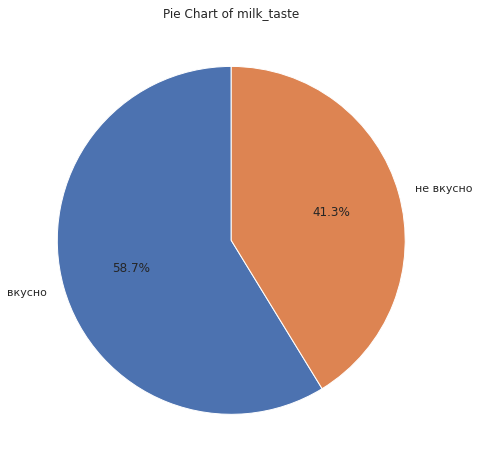

count        623
unique         2
top       вкусно
freq         366
Name: milk_taste, dtype: object


In [20]:
graph_cat(ferma_main, 'milk_taste')

Рассмотрим данные по второму целевому признаку “вкус молока”, который оценивается фермерами по личным критериям и является бинарным признаком (вкусно, не вкусно). В таблице содержится 612 записей, из которых 357 оценены как “вкусно”, что составляет 58.3% от общего числа. Оставшиеся 255 записей, или 41.7%, оценены как “не вкусно”. Это означает, что больше половины коров в списке дают вкусное молоко.

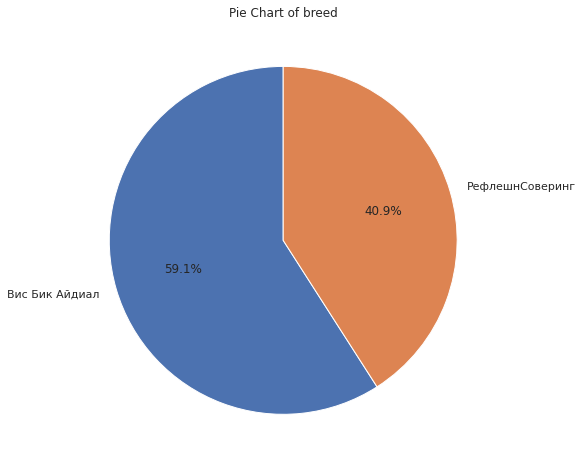

count                623
unique                 2
top       Вис Бик Айдиал
freq                 368
Name: breed, dtype: object


In [21]:
graph_cat(ferma_main, 'breed')

In [22]:
ferma_main['breed'] = ferma_main['breed'].str.lower()

В стаде коров 2 породы Вис Бик Айдиал и Рефлешн Соверинг. В таблице содержится 612 записей, из которых 358 относятся к породе Вис Бик Айдиал, что составляет 58.5% от общего числа. Оставшиеся 254 записей, или 41.5%, относятся к породе Рефлешн Соверинг.

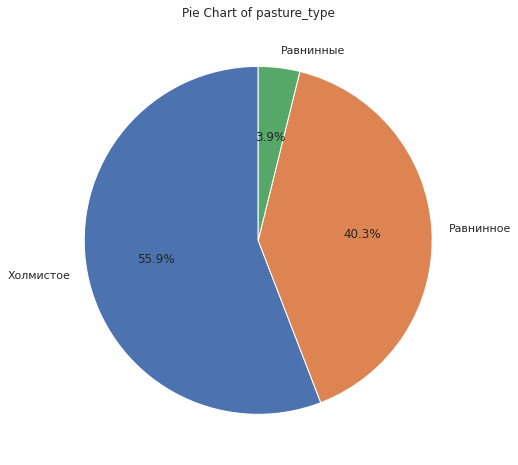

count           623
unique            3
top       Холмистое
freq            348
Name: pasture_type, dtype: object


In [23]:
graph_cat(ferma_main, 'pasture_type')

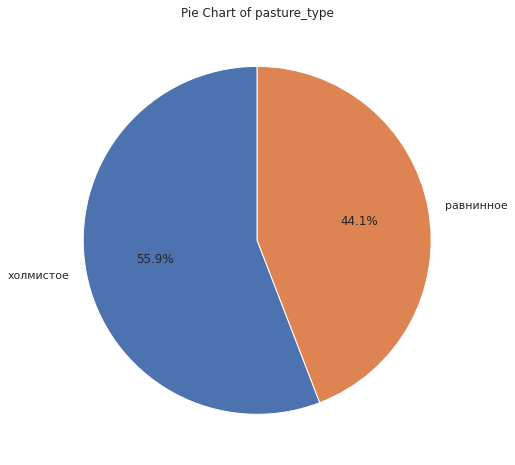

count           623
unique            2
top       холмистое
freq            348
Name: pasture_type, dtype: object


In [24]:
# Исправление признаков
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное')
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.lower()

graph_cat(ferma_main, 'pasture_type')

Тип пастбища — ландшафт лугов, на которых паслась корова. Диаграмма показывает, что в коровы паслись в лугах 2 видов ландшафта. Больше половины коров - 341 коров или 55.7% паслись на скалистых лугах. остальные 44.3% коров паслись на равнинах. 

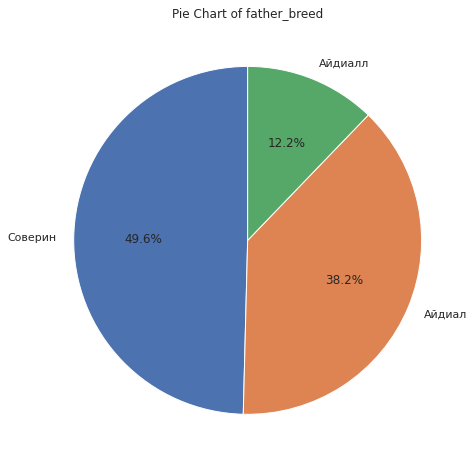

count         623
unique          3
top       Соверин
freq          309
Name: father_breed, dtype: object


In [25]:
graph_cat(ferma_main, 'father_breed')

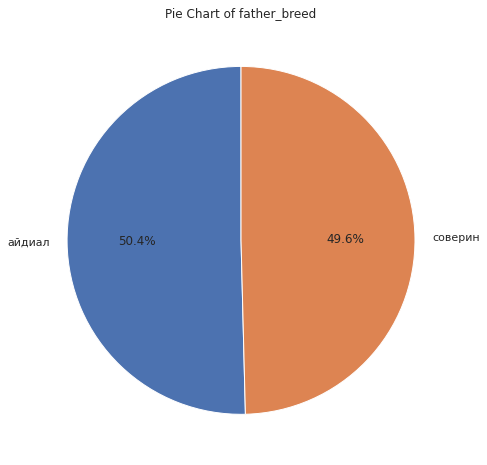

count        623
unique         2
top       айдиал
freq         314
Name: father_breed, dtype: object


In [26]:
# Исправление признаков
ferma_main['father_breed'] = ferma_main['father_breed'].replace('Айдиалл', 'Айдиал')
ferma_main['father_breed'] = ferma_main['father_breed'].str.lower()

graph_cat(ferma_main, 'father_breed')

Порода папы коровы также является бинарным признаком. Породы пап коров почти распределены поровну 50.7% породы Айдиал к 49,3% Соверин.

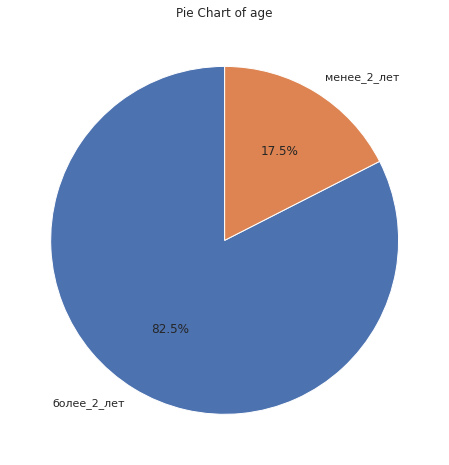

count             623
unique              2
top       более_2_лет
freq              514
Name: age, dtype: object


In [27]:
graph_cat(ferma_main, 'age')

Круговая диаграмма возраст коровы показывает что коровы разделены по возрасту на две группы (менее_2_лет, более_2_лет). Возраст большинства коров - 82,7% более 2 лет.

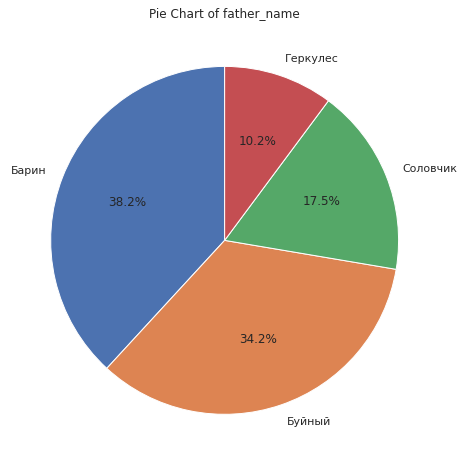

count       629
unique        4
top       Барин
freq        240
Name: father_name, dtype: object


In [28]:
graph_cat(ferma_dad, 'father_name')

Круговая диаграмма отображает распределение быков, которые являются отцами коров в стаде. На диаграмме выделены четыре сегмента: “Барин”, “Бульба”, “Соловчик” и “Геркулес”. Наибольшую долю занимает сегмент “Барин”, который составляет 38.2% от общего числа, что означает, что бык по имени Барин является отцом большинства коров в стаде. Следующим по распространенности является “Бульба” с 34.2%, затем “Соловчик” с 17.5% и “Геркулес” с 10.2%.

**Вывод:** Мы изучили все признаки в таблицах ferma_main и ferma_dad. Исследователький анализ выявил что в некоторые количественные признаки имеют выбросы (milk_yield, fat_content, protein), а некоторые далеки от нормального распределения данных (sugar-protein_ratio). Мы очистили данные от выбросов, где это возможно.

Категориальные данные имели некорректные признаки - одинаковый признак был указан в 2 вариантах. Мы также исправили, приведя все признаки в единый формат.

Таким образом выявили аномалии и ошибки в данных и подготовили данные к анализу.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Отлично по оформлению промежуточных выводов.

## 4. Корреляционный анализ

#### 4.1 Корреляционная матрица

<AxesSubplot:>

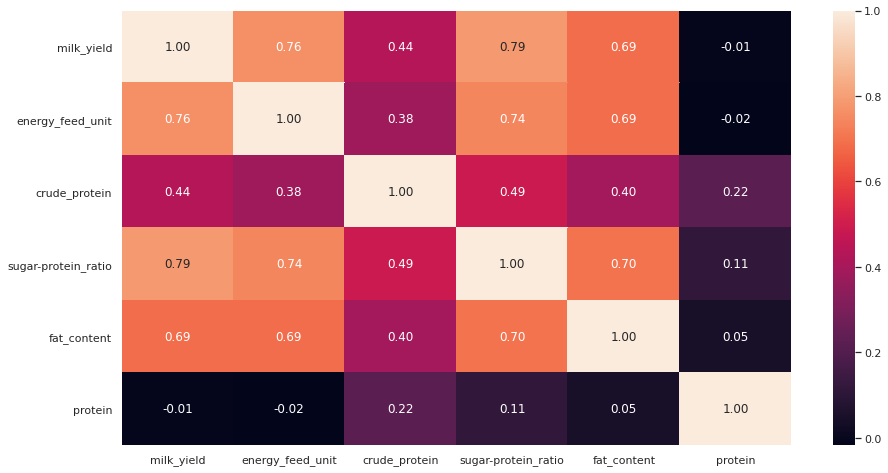

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(ferma_main.loc[:, ferma_main.columns != 'id'].corr(method='spearman'), annot=True, fmt='.2f') 

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если выше мы заметили, что не все признаки распределены нормально, то здесь нужно использовать корреляцию Спирмана или Phik или иные подходы, которые устойчивы к выбросам и ненормальному распределению. Корреляция Пирсона, которая здесь используется по умолчанию, нам не подходит.

`corr(method='spearman')` - так можно измерить корреляцию Спирмана.




</div>
  

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Cнова привет.  По исправлению отлично.
</div> 

Таблица корреляций показывает взаимосвязи между различными количественными признаками в наборе данных. 

Для целевого признака milk_yield (удой молока) наиболее значимые корреляции наблюдаются с:
- energy_feed_unit (0.76): высокая положительная корреляция, что указывает на то, что увеличение энергетической кормовой единицы связано с увеличением удоя молока.
- sugar-protein_ratio (0.79): высокая положительная корреляция, что также указывает на значительное влияние соотношения сахара и протеина на удой молока.
- fat_content (0.69): умеренная положительная корреляция, что указывает на связь между содержанием жира и удоем молока.
- crude_protein (0.44): умеренная положительная корреляция.
- protein (-0.01): нет корреляции.

#### 4.2 Графический анализ заимосвязи

Для анализа влияния различных признаков на целевые признаки milk_yield (удой молока) и milk_taste (вкус молока) в регрессионной модели, я использую следующий метод:
- Для каждого признака, кроме целевых, строится график, где milk_yield (количественный признак) отображается на оси Y.
- Категориальный признак milk_taste добавляется в диаграмму с использованием различных цветов для визуального различения.
- На основе построенных графиков оценивается влияние каждого признака на целевые признаки, что позволяет определить, какие признаки следует включить в регрессионную модель для точного предсказания milk_yield и milk_taste.

Этот метод позволяет визуально оценить взаимосвязи между признаками и целевыми переменными, что способствует более обоснованному выбору признаков для модели.

In [30]:
# Список количественных и категориальных признаков
quantitative_columns = ['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar-protein_ratio', 'fat_content', 'protein']
categorical_columns = ['milk_taste', 'breed', 'pasture_type', 'father_breed', 'age']

def graph_scatter(df, quant_column, cat_column):
    if quant_column != 'milk_yield':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=quant_column, y='milk_yield', hue=cat_column, palette='Set1')
        plt.title(f'Scatterplot of milk_yield vs {quant_column} by {cat_column}')
        plt.show()

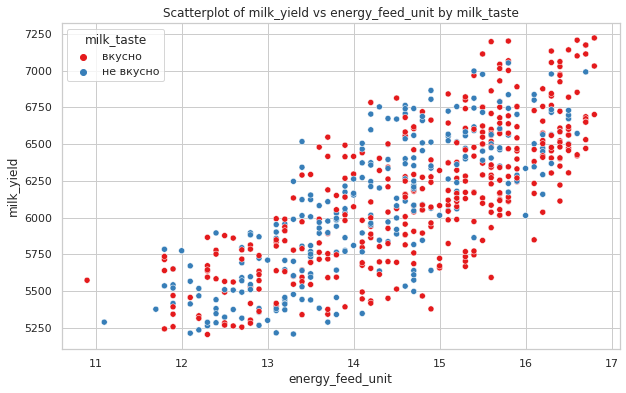

In [31]:
graph_scatter(ferma_main, 'energy_feed_unit', 'milk_taste')

На диаграмме представлен скаттерплот зависимости удоя молока (milk_yield) от энергетической ценности кормов (energy_feed_unit) с учетом вкуса молока (milk_taste).

Ось X: энергетическая ценность кормов (energy_feed_unit), варьируется от 11 до 17.
Ось Y: удой молока (milk_yield), варьируется от 5250 до 7250.
Цветовая дифференциация: красные точки обозначают вкусное молоко, синие — невкусное.

Наблюдается разброс значений удоя молока при различных уровнях энергетической ценности кормов. Это указывает на то, что энергетическая ценность кормов оказывает влияние на удой молока, но не является единственным определяющим фактором. Связь между признаками близка к линейному, но больше похожа на квадратичную. При работе с регрессионным моделем можем рассмотреть вариант с квадратом признака энергетическая ценность кормов.

Вкус молока (вкусное или невкусное) представлен цветами точек на графике. В обоих категориях вкуса молока наблюдается широкий разброс удоя при различных уровнях энергетической ценности кормов, что может свидетельствовать о том, что вкус молока также зависит от других факторов.

Таким образом, энергетическая ценность кормов влияет на удой молока и вкус молока, но для более точного предсказания этих целевых признаков необходимо учитывать дополнительные факторы.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По ЭКЕ и удою у нас что-то среднее между линейной и квадратичной зависимостью. Если присмотреться, можно увидеть кривую, похожую на ветвь паработы - графика квадратичной функции. В проекте нам предлагается устранить здесь квадратичную зависимость (взять квадрат признака), чтобы модель могла корректно учитывать признак.
       
</div> 



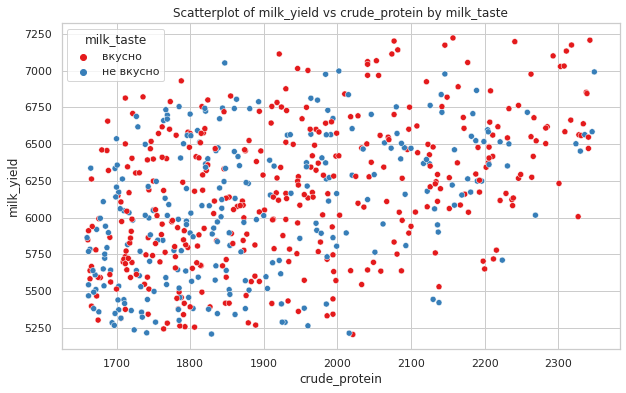

In [32]:
graph_scatter(ferma_main, 'crude_protein', 'milk_taste')

На диаграмме представлен скаттерплот зависимости удоя молока (milk_yield) от содержания сырого протеина в корме (crude_protein) с учетом вкуса молока (milk_taste).

Ось X: содержание сырого протеина в корме (crude_protein), варьируется от 1700 до 2300 граммов.
Ось Y: удой молока (milk_yield), варьируется от 5250 до 7250.
Цветовая дифференциация: красные точки обозначают невкусное молоко, синие — вкусное.

Диаграмма демонстрирует, что удой молока не имеет четкой линейной зависимости от содержания сырого протеина. Точки распределены достаточно хаотично по всему диапазону значений протеина, и явных тенденций в данных не прослеживается.

В обоих категориях вкуса молока наблюдается широкий разброс удоя при различных уровнях содержания сырого протеина, что может свидетельствовать о том, что вкус молока также зависит от других факторов.

Таким образом, содержание сырого протеина в корме оказывает незначительное влияние на удой молока и вкус молока, связь между признаками явно не линейная.

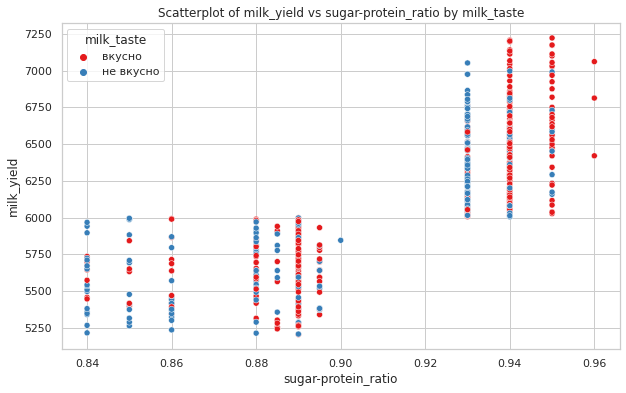

In [33]:
graph_scatter(ferma_main, 'sugar-protein_ratio', 'milk_taste')

Этот график показывает зависимость удоя молока (milk_yield) от соотношения сахара и протеина в корме (sugar-protein_ratio), различая данные по вкусу молока. 

График показывает несколько дискретных значений соотношения сахара и протеина, с которыми связаны удои молока. Видно, что при более высоких значениях соотношения (0.92 и выше) наблюдается более высокий удой, а также большее концентрация красных точек - больше вкусного молока.

На более низких значениях соотношения сахара и протеина (0.84 - 0.90) удои молока значительно ниже и более рассеяны. 

Таким образом, можно сделать вывод, что более высокое соотношение сахара и протеина в корме может способствовать увеличению удоя, а также улучшению вкуса молока, но из-за деление графика на области, связь сложно назвать линейной. Можно рассмотреть вариант регрессионной моделей с переводом данного признака в категориальный тип.

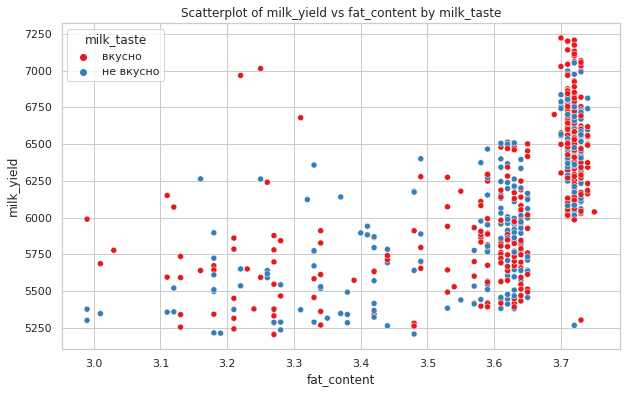

In [34]:
graph_scatter(ferma_main, 'fat_content', 'milk_taste')

На диаграмме рассеивания изображено влияние содержания жира (fat_content) на удой молока (milk_yield) и вкус молока (milk_taste).

С увеличением содержания жира (fat_content) наблюдается тенденция к увеличению удоя молока, особенно заметная при значениях жира выше 3.6%. Разброс данных достаточно широк, но заметно, что при более высоком содержании жира удой в целом выше.

Вкусовые качества молока (milk_taste) также, возможно, связаны с содержанием жира. Однако, разброс красных и синих точек при каждом уровне содержания жира указывает на то, что связь не линейна и вкус молока может быть определён и другими факторами, помимо содержания жира.

На основе анализа графика с содержанием жира можно предположить, что с увеличением содержания жира в молоке возможно увеличение удоя. Также жиры, вероятно, оказывают незначительное влияние на восприятие вкуса молока, возможно, делая его более "вкусным" (судя по большому количеству красных точек при высоком уровне жира).

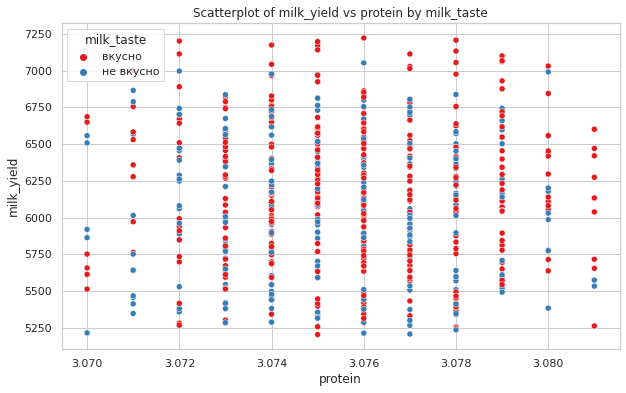

In [35]:
graph_scatter(ferma_main, 'protein', 'milk_taste')

На диаграмме рассеивания показано влияние содержания белка (protein) на удой молока (milk_yield) и вкус молока (milk_taste).

В отличие от содержания жира, содержание белка в диапазоне от 3.070% до 3.080% не демонстрирует очевидной корреляции с удоем молока. Распределение удоя молока по оси Y практически равномерное при всех уровнях белка. Основные значения удоя находятся в диапазоне 5250 до 7250, и видимых скачков или тенденций к росту/падению удоя с изменением содержания белка нет.

На графике также не видно четкой зависимости вкусовых качеств молока от содержания белка. Красные и синие точки разбросаны случайным образом, и в каждом диапазоне содержания белка присутствуют обе категории вкуса молока. Это может указывать на то, что вкус молока также не сильно зависит от уровня белка.

Содержание жира в молоке, скорее всего, оказывает большее влияние на удой молока и вкус молока по сравнению с белком. Это связано с тем, что жиры могут влиять на текстуру и насыщенность молока, что более явно сказывается на его вкусовых качествах.

Таким образом, связь между признаками не линейная и влияние содержания белка в молоке на удой и вкус молока незначительна.

На основе корреляционной матрицы и графиков рассеяния можно сделать следующие выводы:

Тип взаимосвязи между целевым и входными признаками:
- energy_feed_unit: Наблюдается положительная близкая на линейную взаимосвязь с milk_yield.
- crude_protein: Взаимосвязь менее выражена, но также положительная.
- sugar-protein_ratio: Сильная положительная взаимосвязь.
- fat_content: Положительная взаимосвязь, но менее выраженная.
- protein: Взаимосвязь практически отсутствует.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

Во всех случаях важно уточнить, где у нас в признаках наблюдается нелинейная связь количественных признаков с удоем. 

***
 
Линейная связь на скаттерплоте выглядит как вытянутое в линию облако точек. Чем больше оно вытянуто, тем сильнее связь. Если связь совсем слабая, облако почти круглое.
    
* Если облако кривое − квадратичная зависимость.
* если облаков несколько − тенденция к кластеризации.
    
Оба варианта не относятся к линейной зависимости. Важно еще раз внимательно посмотреть на скаттерплоты и перечислить, где у нас не наблюдается линейной зависимости. Дальше в проекте при построении второй итерации линейной модели нам предлагается исключить нелинейность. Как увидим, это повышает качество модели.
    
Обрати внимание на ЭКЕ, СПО и жирность.

</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Ок, по ЭКЕ информация есть. По СПО я бы также добавил, что связь нелинейная. 
</div>

## 5. Обучение модели линейной регрессии

Перейдем к регрессионной моделе для предсказания целевого признака Удой молока. Для начала, создадим функцию, которя построит модель:
- разделит данные на тренеровочный и тестывый выборки
- кодирует кадегориальные признаки
- масштабирует количественные признаки
- обучит модель
- подсчитает метрики качества для обученной модели
- вывидит гистаграмму распределения и дисперсию остатков
- предскажет целевой признак
- вернет метрики и датафрейм с целевым признаком.

In [36]:
# Создание таблицы для сравнения
def capture_info(df):
    buffer = io.StringIO()
    df.info(buf=buffer)
    return buffer.getvalue()

def display_side_by_side_info(df1, df2, title1="Training Data", title2="Test Data"):
    info1 = capture_info(df1)
    info2 = capture_info(df2)
    
    # HTML for displaying info side by side
    html = f"""
    <div style="display: flex;">
        <div style="flex: 1; margin-right: 20px;">
            <h4>{title1}</h4>
            <pre>{info1}</pre>
        </div>
        <div style="flex: 1;">
            <h4>{title2}</h4>
            <pre>{info2}</pre>
        </div>
    </div>
    """
    
    display(HTML(html))

In [37]:
# Функция для построения регрессионной модели
def regress(df, X_labels, y_label, prediction_df=None):
    
    # разделение на тренировочную и тестовую выборки
    RANDOM_STATE = 42
    X = df[X_labels]
    y = df[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    # Определение категориальных и числовых признаков
    cat_col_names = X.select_dtypes(include=['object']).columns
    num_col_names = X.select_dtypes(include=['number']).columns
    
    # Прямое кодирование категориальных признаков с удалением первого столбца
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # Масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # Объединение кодированных и масштабированных признаков
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # проверка тренеровочной и тестовой выборок
    print('Сomparison of training and test sample data:')
    display_side_by_side_info(X_train, X_test)
    
    # инициализация и обучение модели
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)

    # предсказанные значения для X_test
    predictions = model_lr.predict(X_test)
    
    # Вычисление остатков
    residuals = y_test - predictions
    
    # Рассчёт доверительного интервала
    interval_95 = st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions))
        
    # Подсчет метрик
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    resid = residuals.median()
    interval_95_lower = interval_95[0]
    interval_95_upper = interval_95[1]
         
    metrics = {
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'resid': resid,
        'interval_95_lower': interval_95_lower,
        'interval_95_upper': interval_95_upper
    }
    
    print('------------------------------------------------------')
    print(f"R² LinearRegression = {round(r2, 3)}")
    print(f"MSE = {round(mse, 3)}")
    print(f"RMSE = {round(rmse, 3)}")
    print(f"MAE = {round(mae, 3)}")
    
    # Анализ остатков
    # Создание фигуры и осей для двух графиков
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Гистограмма остатков
    sns.histplot(residuals, kde=True, bins=20, ax=ax[0])
    ax[0].set_title('Histogram of Residuals')
    ax[0].set_xlabel('Residuals')
    ax[0].set_ylabel('Frequency')

    # Скаттерплот дисперсии (Residuals vs Fitted Values)
    ax[1].scatter(predictions, residuals)
    ax[1].axhline(y=0, color='red', linestyle='--')
    ax[1].set_title('Residuals vs Fitted Values')
    ax[1].set_xlabel('Fitted Values (Predictions)')
    ax[1].set_ylabel('Residuals')

    # Добавление константы (intercept) для модели
    X_test_with_const = sm.add_constant(X_test)

    # Проведение теста Бройша-Пагана
    bp_test = het_breuschpagan(residuals, X_test_with_const)

    # Результаты теста
    labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    results = dict(zip(labels, bp_test))
    
    print('')
    print('Breusch-Pagan Test Results:')
    for key, value in results.items():
        print(f"{key}: {round(value, 3)}")
        
    # Подстройка отображения
    plt.show()
       
    if prediction_df is not None:
        # Подготовка нового набора данных
        X_pred_cat = encoder.transform(prediction_df[cat_col_names])
        X_pred_num = scaler.transform(prediction_df[num_col_names])

        X_pred_cat = pd.DataFrame(X_pred_cat, columns=encoder_col_names)
        X_pred_num = pd.DataFrame(X_pred_num, columns=num_col_names)

        X_pred = pd.concat([X_pred_cat, X_pred_num], axis=1)

        # Прогнозирование
        y_pred = model_lr.predict(X_pred)

        # Добавление прогнозов в DataFrame
        prediction_df['milk_yield'] = y_pred

    return metrics, prediction_df

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Хорошее решение. По коду все верно.
</div>   



С помошью созданной функции создадим модель. В качестве целевого признака выберим Удой - 'milk_yield'. Для начала, добавим в модель признаки, связанные с количеством и качеством питательных веществ, поступающих из кормов, а также генетические факторы: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, СПО (Сахаро-протеиновое соотношение), Порода, Тип пастбища, порода папы_быка, Возраст.

In [38]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   623 non-null    int64  
 1   milk_yield           623 non-null    int64  
 2   energy_feed_unit     623 non-null    float64
 3   crude_protein        623 non-null    int64  
 4   sugar-protein_ratio  623 non-null    float64
 5   breed                623 non-null    object 
 6   pasture_type         623 non-null    object 
 7   father_breed         623 non-null    object 
 8   fat_content          623 non-null    float64
 9   protein              623 non-null    float64
 10  milk_taste           623 non-null    object 
 11  age                  623 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.3+ KB


Сomparison of training and test sample data:


------------------------------------------------------
R² LinearRegression = 0.783
MSE = 47499.999
RMSE = 217.945
MAE = 173.801

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 4.975
p-value: 0.663
f-value: 0.697
f p-value: 0.675


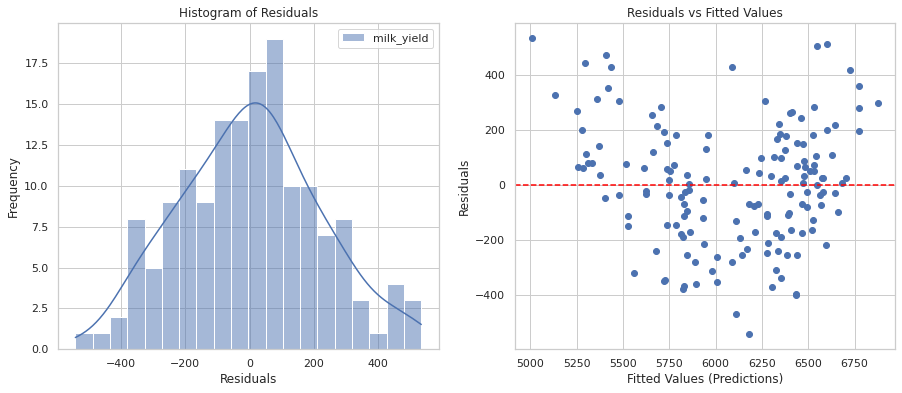

In [39]:
# Определение параметров функции
X_labels = ['energy_feed_unit', 'crude_protein', 'sugar-protein_ratio', 'breed', 'pasture_type', 'father_breed', 'age']
y_label = ['milk_yield']

# Построение модели
model1 = regress(ferma_main, X_labels, y_label)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Ок.
</div>   



Выше представлены результаты построенной регрессионной модели. В сравнении информации по тренеровочной и тестовой выборок можно увидеть, что функция корректно разделила данные в соотношении 3 к 1. Категориальные признаки корректно закодированы в бинарные данные.

- Метрика R² - 0.783 указывает на то, что модель объясняет около 78.3% вариации в данных, что считается довольно высоким показателем.
- MSE (Mean Squared Error) = 47499.999: Средняя квадратичная ошибка, которая показывает среднее значение квадратов ошибок модели (разница между предсказанными и фактическими значениями). Меньшие значения MSE указывают на лучшее соответствие модели данным.
- RMSE (Root Mean Squared Error) = 217.945: Корень из среднеквадратичной ошибки. Это стандартное отклонение ошибок модели, которое также показывает, насколько сильно предсказания модели отличаются от фактических значений.
- MAE (Mean Absolute Error) = 173.801: Средняя абсолютная ошибка, которая показывает среднее абсолютное значение ошибок модели. Опять же, меньшие значения указывают на более точные предсказания модели.

На гистограмме показано распределение остатков (разница между фактическими и предсказанными значениями). Гистограмма имеет форму, близкую к нормальному распределению, что является хорошим показателем для линейной регрессии, указывающим на то, что модель не систематически ошибается.

Красная линия в графике дисперсии остатков на уровне 0 показывает, что остатки распределены вокруг этой линии, но наблюдается некоторое рассеивание. Это может указывать на то, что модель может пропускать некоторые нелинейные зависимости в данных, хотя явной проблемы с гетероскедастичностью (изменением дисперсии остатков) нет, судя по результатам теста Breusch-Pagan.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Верно по формулировкам, хорошие определения метрик.
</div>   



Попробуем улучшить модель на основе корреляционного графического анализа. Для анализа будем брать только признаки с достаточным уровнем корреляции.

Перевод переменной sugar-protein_ratio в категориальную форму может быть полезным в данной ситуации, так как на графике четко видны дискретные значения этой переменной. Когда данные имеют дискретные значения, особенно когда они явно разделены на несколько значений, как в данном случае, использование категориальной переменной может упростить анализ и улучшить результаты моделей.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Ага, зедсь уже иначе пишем про нелинейность. Тогда тем более нужно выше все поправить в выводах.
</div>   



In [40]:
# Создание категориальной переменной на основе признака 'sugar-protein_ratio'
ferma_main['sugar-protein_category'] = ferma_main['sugar-protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
ferma_main['sugar-protein_category'] = ferma_main['sugar-protein_category'].astype(object)

# Проверка
ferma_main['sugar-protein_category'].describe()

count     623
unique      2
top         1
freq      369
Name: sugar-protein_category, dtype: int64

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

График выше по СПО после категоризации я бы убрал, он не очень корректен.
        
</div> 

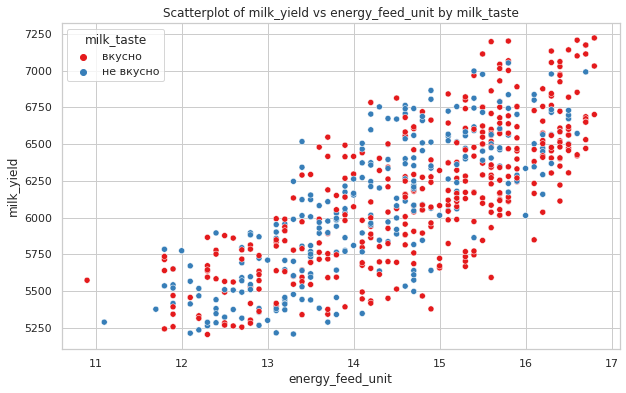

In [41]:
# Возвышение 'energy_feed_unit' в квадрат
ferma_main['energy_feed_unit_squered'] = ferma_main['energy_feed_unit'] ** 2

# Проверка изменения на графике
graph_scatter(ferma_main, 'energy_feed_unit', 'milk_taste')

In [42]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        623 non-null    int64  
 1   milk_yield                623 non-null    int64  
 2   energy_feed_unit          623 non-null    float64
 3   crude_protein             623 non-null    int64  
 4   sugar-protein_ratio       623 non-null    float64
 5   breed                     623 non-null    object 
 6   pasture_type              623 non-null    object 
 7   father_breed              623 non-null    object 
 8   fat_content               623 non-null    float64
 9   protein                   623 non-null    float64
 10  milk_taste                623 non-null    object 
 11  age                       623 non-null    object 
 12  sugar-protein_category    623 non-null    object 
 13  energy_feed_unit_squered  623 non-null    float64
dtypes: float64

Сomparison of training and test sample data:


------------------------------------------------------
R² LinearRegression = 0.835
MSE = 36207.49
RMSE = 190.283
MAE = 149.72

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 3.271
p-value: 0.859
f-value: 0.453
f p-value: 0.867


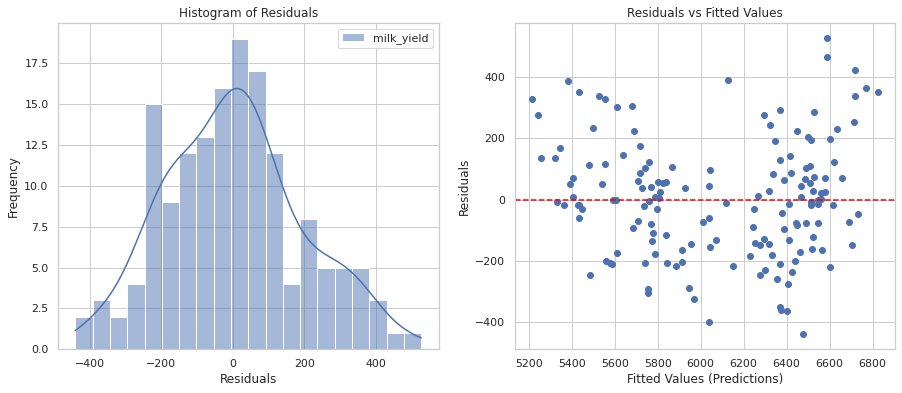

In [43]:
X_labels = ['energy_feed_unit_squered', 'crude_protein', 'breed', 'pasture_type', 'father_breed', 'age',
            'sugar-protein_category']
y_label = ['milk_yield']

model2 = regress(ferma_main, X_labels, y_label)

Второя модель, с учетом улучшений имеет более лучшие покозатели:
- Значение коэффициента детерминации R² увеличилось до 0.835, что указывает на то, что модель теперь объясняет около 83.5% вариации в данных. Это улучшение по сравнению с предыдущей моделью, которая объясняла 78.3% вариации.
- Средняя квадратичная ошибка и Корень из среднеквадратичной ошибки уменьшились, что говорит о том, что новая модель стала точнее в предсказаниях.
- Средняя абсолютная ошибка также уменьшилась, что свидетельствует о том, что новая модель в среднем совершает меньшие ошибки.

Гистограмма остатков по-прежнему близка к нормальному распределению, что говорит о том, что остатки (ошибки модели) распределены нормально, что является хорошим признаком для линейной регрессии.

Красная линия на уровне 0 показывает, что остатки распределены вокруг этой линии. В отличие от предыдущей модели, здесь наблюдается более плотное расположение точек вокруг оси, что может свидетельствовать о некотором улучшении в предсказательной способности модели, хотя всё ещё присутствуют некоторые выбросы.

Попробуем улучшить модель на основе данных таблицы ferma_dad.

In [44]:
# Объединяем DataFrame ferma_main и ferma_dad по столбцу 'id'
ferma_main = ferma_main.merge(ferma_dad, on='id', how='left')

ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        623 non-null    int64  
 1   milk_yield                623 non-null    int64  
 2   energy_feed_unit          623 non-null    float64
 3   crude_protein             623 non-null    int64  
 4   sugar-protein_ratio       623 non-null    float64
 5   breed                     623 non-null    object 
 6   pasture_type              623 non-null    object 
 7   father_breed              623 non-null    object 
 8   fat_content               623 non-null    float64
 9   protein                   623 non-null    float64
 10  milk_taste                623 non-null    object 
 11  age                       623 non-null    object 
 12  sugar-protein_category    623 non-null    object 
 13  energy_feed_unit_squered  623 non-null    float64
 14  father_nam

Сomparison of training and test sample data:


------------------------------------------------------
R² LinearRegression = 0.841
MSE = 34749.382
RMSE = 186.412
MAE = 146.717

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 4.559
p-value: 0.919
f-value: 0.436
f p-value: 0.927


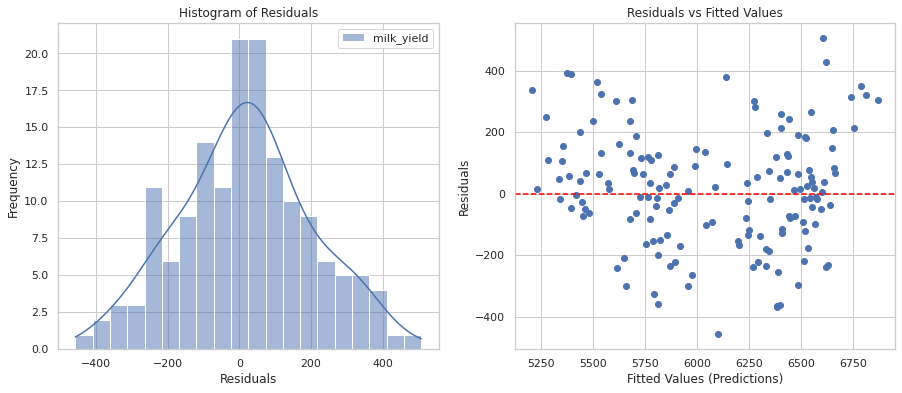

In [45]:
X_labels = ['energy_feed_unit_squered', 'crude_protein', 'breed', 'pasture_type', 'father_breed', 'age',
            'sugar-protein_category', 'father_name']
y_label = ['milk_yield']

model3 = regress(ferma_main, X_labels, y_label)

На изображении представлены результаты обучения третьей модели линейной регрессии. Давайте рассмотрим основные показатели:
- Коэффициент детерминации увеличился до 0.841, что указывает на то, что данная модель объясняет 84.1% вариации данных. Это наивысший показатель среди всех трех моделей.
- Средняя квадратичная ошибка (MSE) уменьшилась до 34749.382, что свидетельствует о более точных предсказаниях по сравнению с предыдущими моделями.
- Корень из среднеквадратичной ошибки (RMSE) также уменьшился, что подтверждает улучшение модели.
- Средняя абсолютная ошибка (MAE) уменьшилась до 146.717, что указывает на то, что третья модель допускает меньшие ошибки в среднем.

Гистограмма остатков все еще приближена к нормальному распределению, что говорит о нормальности распределения ошибок модели.

На графике остатков и предсказанных значений точки распределены более равномерно вокруг оси 0, что указывает на то, что модель работает лучше и производит более точные предсказания.

In [46]:
models_metrics = [model1[0], model2[0], model3[0]]

metrics = pd.DataFrame(models_metrics)
display(metrics)

,r2,mse,rmse,mae,resid,interval_95_lower,interval_95_upper
0,0.783203,47499.999455,217.944946,173.801223,milk_yield 6.278929 dtype: float64,[6020.113044732578],[6155.922419618935]
1,0.834744,36207.490016,190.282658,149.719800,milk_yield -0.889187 dtype: float64,[6017.963133926981],[6153.91656027388]
2,0.841399,34749.381985,186.411861,146.716601,milk_yield 16.997152 dtype: float64,[6003.688125568125],[6141.7037550125415]


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Заемчательно.
</div>  

Сравнение моделей:
- R²: Третья модель имеет наивысшее значение R² (0.841), что означает лучшую объясняющую способность среди всех моделей.
- MSE и RMSE: Третья модель показала наименьшие значения MSE и RMSE, что указывает на наилучшую точность предсказаний.
- MAE: Средняя абсолютная ошибка также наименьшая у третьей модели (146.717), что указывает на минимальные ошибки модели.
- Residual Median: Остаток медианы для третьей модели стал выше, но это не оказывает значительного влияния на общую оценку модели.
- Интервалы 95%: Третья модель имеет несколько более узкий доверительный интервал, что указывает на уверенность в предсказаниях.

Таким образом, третья модель является наилучшей по сравнению с двумя предыдущими моделями, так как она показала лучшие результаты по основным метрикам и тестам.

На основе 3 модели предскажем целевой признак в таблице cow_buy. Подготовим таблицу для модели.

In [47]:
display(cow_buy)

,breed,pasture_type,father_breed,father_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [48]:
# Недостающие столбцы
missing_columns = ['energy_feed_unit', 'crude_protein', 'sugar-protein_ratio']

# Добавляем столбцы
for column in missing_columns:
    cow_buy[column] = ferma_main[column].mean() * 1.05
    
# Преобразуем sugar_protein_ratio в категориальный признак
cow_buy['sugar-protein_category'] = cow_buy['sugar-protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
cow_buy['sugar-protein_category'] = cow_buy['sugar-protein_category'].astype(object)

# Преобразуем признак energy_feed_unit
cow_buy['energy_feed_unit_squered'] = cow_buy['energy_feed_unit'] ** 2

# Переводим столбцы в нижний регистр
cow_buy['breed'] = cow_buy['breed'].str.lower()
cow_buy['father_breed'] = cow_buy['father_breed'].str.lower()

# Удаляем лишние столбцы
# cow_buy = cow_buy.drop(['protein_percentage', 'fat_percentage', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)

display(cow_buy)

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,energy_feed_unit,crude_protein,sugar-protein_ratio,sugar-protein_category,energy_feed_unit_squered
0,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
1,вис бик айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833
2,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
3,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
4,рефлешнсоверинг,равнинное,айдиал,Буйный,3.64,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
5,рефлешнсоверинг,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833
6,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
7,вис бик айдиал,равнинное,соверин,Буйный,3.57,3.079,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
8,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833
9,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.079,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833


Предскажем целевой признак для модели и добавим в таблицу cow_buy предсказанные данные

Сomparison of training and test sample data:


------------------------------------------------------
R² LinearRegression = 0.841
MSE = 34749.382
RMSE = 186.412
MAE = 146.717

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 4.559
p-value: 0.919
f-value: 0.436
f p-value: 0.927


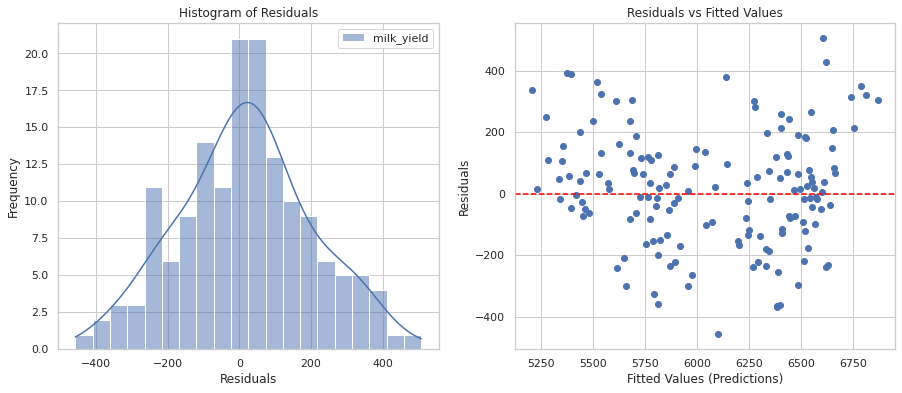

{'r2': 0.8413986635664517,
 'mse': 34749.381985082604,
 'rmse': 186.41186117058808,
 'mae': 146.7166005193786,
 'resid': milk_yield    16.997152
 dtype: float64,
 'interval_95_lower': array([6003.68812557]),
 'interval_95_upper': array([6141.70375501])}

In [49]:
metrics, milk_yield_prediction = regress(ferma_main, X_labels, y_label, prediction_df=cow_buy)
display(metrics)

In [50]:
display(cow_buy)

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,energy_feed_unit,crude_protein,sugar-protein_ratio,sugar-protein_category,energy_feed_unit_squered,milk_yield
0,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6609.253673
1,вис бик айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6358.102672
2,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6283.593214
3,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6599.114441
4,рефлешнсоверинг,равнинное,айдиал,Буйный,3.64,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6544.619925
5,рефлешнсоверинг,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6442.500251
6,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6609.253673
7,вис бик айдиал,равнинное,соверин,Буйный,3.57,3.079,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6556.597150
8,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6283.593214
9,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.079,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6400.619963


 <div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Наверное, нужно дорабоать, не создавать два одинаковых признака. Сейчас predictions, milk_yield_pred - одно и то же.
  


## 6. Обучение модели логистической регрессии

Перейдем к модели логической регрессии для предсказания целевого признака вкус молока. Для начала, создадим функцию, которя построит модель:
- разделит данные на тренеровочный и тестывый выборки
- кодирует кадегориальные признаки
- масштабирует количественные признаки
- обучит модель
- подсчитает метрики качества для обученной модели
- вывидит матрицу ошибок
- предскажет целевой признак
- вернет метрики и датафрейм с целевым признаком.

In [51]:
def logit(df, X_labels, y_label, threshold=None, threshold_min=None, threshold_max=None, prediction_df=None):
    X = df[X_labels]
    y = df[y_label]
        
    # Преобразование целевой переменной в бинарный вид
    y = df[y_label].map({'вкусно': 1, 'не вкусно': 0})
    
    # Разбиение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
    # Определение категориальных и числовых признаков
    cat_col_names = X.select_dtypes(include=['object']).columns
    num_col_names = X.select_dtypes(include=['number']).columns
    
    # Кодирование категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # Масштабирование числовых признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # Объединение кодированных и масштабированных признаков
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # Обучение модели логистической регрессии
    model_lr = LogisticRegression(max_iter=1000, random_state=42)
    model_lr.fit(X_train, y_train)
    
    # Предсказания вероятностей на тестовой выборке
    y_pred_proba = model_lr.predict_proba(X_test)[:, 1]
    
    # Если threshold=None и заданы threshold_min и threshold_max
    if threshold is None and threshold_min is not None and threshold_max is not None:
        thresholds = np.linspace(threshold_min, threshold_max, 10)
        results = []
        
        for thresh in thresholds:
            y_pred = (y_pred_proba >= thresh).astype(int)
            precision = precision_score(y_test, y_pred, pos_label=1)
            recall = recall_score(y_test, y_pred, pos_label=1)
            fp = np.sum((y_test == 0) & (y_pred == 1))
            results.append({'threshold': thresh, 'precision': precision, 'recall': recall, 'fp': fp})
        
        results_df = pd.DataFrame(results)
        print(results_df)
        return results_df
    
    # Если threshold задано как число
    if threshold is not None:
        y_pred = (y_pred_proba >= threshold).astype(int)
    else:
        y_pred = (y_pred_proba >= 0.5).astype(int)
    
    # Оценка качества модели
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Метрики оценки модели
    # metrics = {
    #     'accuracy': accuracy,
    #     'recall': recall,
    #     'precision': precision
    # }
    
    print(f"Threshold = {threshold if threshold is not None else 0.5}")
    print(f"Accuracy = {round(accuracy, 3)}")
    print(f"Recall = {round(recall, 3)}")
    print(f"Precision = {round(precision, 3)}")
    
    # Построение матрицы ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Если есть prediction_df, предсказание на новых данных
    if prediction_df is not None:
        X_pred_cat = encoder.transform(prediction_df[cat_col_names])
        X_pred_num = scaler.transform(prediction_df[num_col_names])
        X_pred_cat = pd.DataFrame(X_pred_cat, columns=encoder_col_names)
        X_pred_num = pd.DataFrame(X_pred_num, columns=num_col_names)
        X_pred = pd.concat([X_pred_cat, X_pred_num], axis=1)
        y_pred_proba_new = model_lr.predict_proba(X_pred)[:, 1]
        y_pred_new = (y_pred_proba_new >= (threshold if threshold is not None else 0.5)).astype(int)
        prediction_df['milk_taste_pred'] = y_pred_new
    
    # return metrics, prediction_df
    return prediction_df

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично 
</div> 
    

In [52]:
display(ferma_main.head())

,id,milk_yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,pasture_type,father_breed,fat_content,protein,milk_taste,age,sugar-protein_category,energy_feed_unit_squered,father_name
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


Threshold = 0.5
Accuracy = 0.615
Recall = 0.793
Precision = 0.622


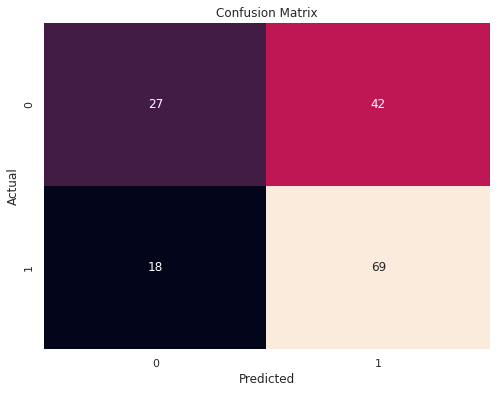

In [53]:
X_labels = ['energy_feed_unit_squered', 'crude_protein', 'sugar-protein_category', 'breed', 'pasture_type', 'father_breed',
            'fat_content', 'protein', 'age', 'father_name']
y_label = 'milk_taste'

predictions = logit(ferma_main, X_labels, y_label)

Результаты логистической регрессии по предсказанию вкуса молока (milk_taste) на основе предоставленного датафрейма показывают следующие метрики:
- Accuracy: 0.615 Это доля правильных предсказаний модели. Значение 0.615 означает, что модель правильно предсказала вкус молока в 61.5% случаев.
- Precision: 0.622 Это доля правильных положительных предсказаний среди всех положительных предсказаний. Значение 0.622 означает, что 62.2% предсказаний “вкусно” были правильными.
- Recall: 0.793 Это доля правильных положительных предсказаний среди всех истинных положительных случаев. Значение 0.793 означает, что модель правильно предсказала 79.3% всех случаев “вкусно”.
- F1 Score: 0.697 Это гармоническое среднее между Precision и Recall. Значение 0.697 указывает на баланс между этими двумя метриками.

Высокое значение TP (69) и умеренное значение FN (18) указывают на то, что модель хорошо справляется с предсказанием случаев, когда молоко вкусное. FP (42) и TN (27) показывают, что модель иногда ошибается, предсказывая молоко как вкусное, когда оно не вкусное, и наоборот.

При анализе логистической регрессии для предсказания вкуса молока, важно учитывать, какая ошибка — первого рода (ложноположительный результат) или второго рода (ложноотрицательный результат) — является более критичной.

Ошибка первого рода (False Positive):
Модель предсказывает, что молоко будет вкусным, но на самом деле оно невкусное. Это критично, поскольку корову, которая производит невкусное молоко, могут ошибочно выбрать для покупки, что приведёт к разочарованию покупателя.

Ошибка второго рода (False Negative):
Модель предсказывает, что молоко невкусное, хотя на самом деле оно вкусное. Это менее критично, но всё же нежелательно, так как потенциально вкусное молоко останется нераспознанным.

Основная метрика:
Для задачи, где важно минимизировать вероятность покупки коровы с невкусным молоком, ключевой метрикой будет precision. Это связано с тем, что высокая precision минимизирует ложные срабатывания, что важно для предотвращения покупки коров, которые на самом деле не дают вкусное молоко.

Чтобы снизить вероятность критичной ошибки (ложноположительных результатов), можно увеличить порог принадлежности к классу "вкусно". Это приведёт к тому, что модель будет менее склонна предсказывать вкусное молоко, что снизит число ложноположительных результатов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно, минимизируем ложположительные ошибки. Главная метрика precision.
</div> 

In [54]:
results_df = logit(ferma_main, X_labels, y_label, threshold_min=0.6, threshold_max=0.85)

   threshold  precision    recall  fp
0   0.600000   0.683544  0.620690  25
1   0.627778   0.707692  0.528736  19
2   0.655556   0.721311  0.505747  17
3   0.683333   0.750000  0.413793  12
4   0.711111   0.800000  0.321839   7
5   0.738889   0.862069  0.287356   4
6   0.766667   0.954545  0.241379   1
7   0.794444   0.937500  0.172414   1
8   0.822222   1.000000  0.114943   0
9   0.850000   1.000000  0.057471   0


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По умолчанию у нас порог 0.5. Выше видим, что точность при нем нас не устраивает. Значит порог будет точно выше. Тогда при подборе порога можно смело начинать с 0.6 и заканчивать 0.85
        
</div> 

Как видим максимальное значение precision на уровне 0.77. Установим порог на этом уровне. Также дадим прогноз с более низким уровнем порога на уровне 0.7 на выбор для заказчика.

 <div class="alert alert-block alert-danger">
<h2><S> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если бы мы хотели соблюдать баланс полноты и точности с некоторым акцентом на точность, то твое решение было бы полностью верным и оправданным.
    
Однако в задании проекта у нас сказано, что «фермер не хочет рисковать», что «критичную ошибку нужно свести к нулю». Это означает, что порог нужно будет сделать еще выше. Здесь мы уже смотрим на полноту только в контексте того, что мы должны следить, чтобы модель была минимально адекватна (модель, которая не будет предсказывать вкусное молоко никогда − нас не устроит).
    
Я бы взял порог, когда precision очень близка к единице. Я бы заложил 3-5 ложположительных ошибок на случай, если для каких-то коров у нас были неверные метки классов (отлавливать последнюю корову моделью не нужно).
    
Думаю, порог в 0.8 нам подойдет. При этом может не оказаться в итоге коров с вкусным молоком. Это нормальный ответ в нашем проекте.
  


Threshold = 0.7
Accuracy = 0.577
Recall = 0.356
Precision = 0.756


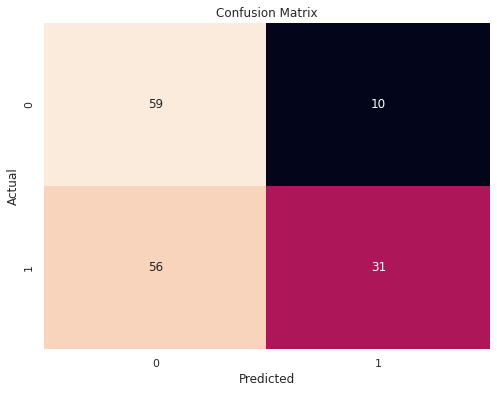

In [55]:
predictions = logit(ferma_main, X_labels, y_label, threshold=0.7)

Как видно из матрицы ошибок, мы минимизировали ошибки FP, максимизировали метрику Precision. На основи обеченной модели предскажем вкус молока для таблицы cow_buy. Для этого сначала подготовим таблицу.

In [56]:
cow_buy_logit = cow_buy.copy()
selected_columns = ['breed', 'pasture_type', 'father_breed', 'father_name', 'fat_content', 'protein', 'age',
                    'crude_protein', 'sugar-protein_category', 'energy_feed_unit_squered']
cow_buy_logit = cow_buy_logit[selected_columns]

display(cow_buy_logit)
cow_buy_logit.info()

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,crude_protein,sugar-protein_category,energy_feed_unit_squered
0,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833
1,вис бик айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,2019.77191,1,233.378833
2,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833
3,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,2019.77191,1,233.378833
4,рефлешнсоверинг,равнинное,айдиал,Буйный,3.64,3.074,более_2_лет,2019.77191,1,233.378833
5,рефлешнсоверинг,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,2019.77191,1,233.378833
6,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833
7,вис бик айдиал,равнинное,соверин,Буйный,3.57,3.079,более_2_лет,2019.77191,1,233.378833
8,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833
9,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.079,менее_2_лет,2019.77191,1,233.378833


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   breed                     20 non-null     object 
 1   pasture_type              20 non-null     object 
 2   father_breed              20 non-null     object 
 3   father_name               20 non-null     object 
 4   fat_content               20 non-null     float64
 5   protein                   20 non-null     float64
 6   age                       20 non-null     object 
 7   crude_protein             20 non-null     float64
 8   sugar-protein_category    20 non-null     object 
 9   energy_feed_unit_squered  20 non-null     float64
dtypes: float64(4), object(6)
memory usage: 1.7+ KB


Передадим таблицу для предсказания в функцию.

Threshold = 0.77
Accuracy = 0.571
Recall = 0.241
Precision = 0.955


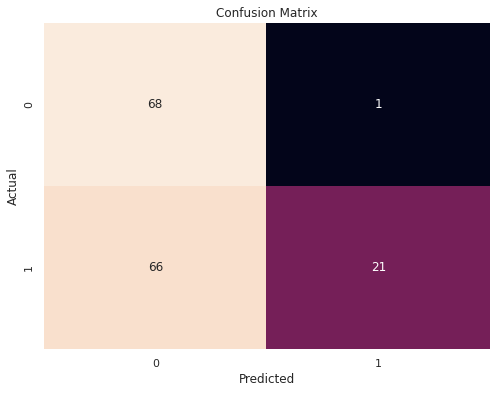

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,crude_protein,sugar-protein_category,energy_feed_unit_squered,milk_taste_pred
0,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833,0
1,вис бик айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,2019.77191,1,233.378833,0
2,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833,0
3,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,2019.77191,1,233.378833,0
4,рефлешнсоверинг,равнинное,айдиал,Буйный,3.64,3.074,более_2_лет,2019.77191,1,233.378833,0
5,рефлешнсоверинг,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,2019.77191,1,233.378833,0
6,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833,0
7,вис бик айдиал,равнинное,соверин,Буйный,3.57,3.079,более_2_лет,2019.77191,1,233.378833,0
8,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833,0
9,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.079,менее_2_лет,2019.77191,1,233.378833,0


In [57]:
predictions = logit(ferma_main, X_labels, y_label, threshold=0.77, prediction_df=cow_buy_logit)

display(predictions)

Threshold = 0.7
Accuracy = 0.577
Recall = 0.356
Precision = 0.756


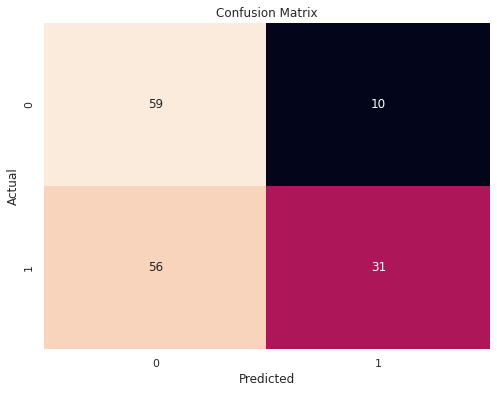

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,crude_protein,sugar-protein_category,energy_feed_unit_squered,milk_taste_pred
0,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833,0
1,вис бик айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,2019.77191,1,233.378833,0
2,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833,0
3,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,2019.77191,1,233.378833,0
4,рефлешнсоверинг,равнинное,айдиал,Буйный,3.64,3.074,более_2_лет,2019.77191,1,233.378833,0
5,рефлешнсоверинг,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,2019.77191,1,233.378833,0
6,вис бик айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,1,233.378833,0
7,вис бик айдиал,равнинное,соверин,Буйный,3.57,3.079,более_2_лет,2019.77191,1,233.378833,0
8,рефлешнсоверинг,равнинное,соверин,Барин,3.59,3.074,более_2_лет,2019.77191,1,233.378833,0
9,рефлешнсоверинг,холмистое,айдиал,Буйный,3.40,3.079,менее_2_лет,2019.77191,1,233.378833,0


In [58]:
predictions = logit(ferma_main, X_labels, y_label, threshold=0.7, prediction_df=cow_buy_logit)

display(predictions)

In [59]:
cow_buy['milk_taste'] = predictions['milk_taste_pred']
display(cow_buy[cow_buy['milk_taste'] == 1])

,breed,pasture_type,father_breed,father_name,fat_content,protein,age,energy_feed_unit,crude_protein,sugar-protein_ratio,sugar-protein_category,energy_feed_unit_squered,milk_yield,milk_taste
13,вис бик айдиал,холмистое,соверин,Барин,3.42,3.075,менее_2_лет,15.276742,2019.77191,0.958947,1,233.378833,6102.464078,1


Таким образом модель с максимальным уровнем precision предсказала, что в списке на покупку нет коров с вкусным молоком. Модель с порогом 0.7 предсказала, что только у 1 коровы из списка на покупку молоко вкусное. Таким образом, мы можем порекомендовать к покупки только одну корову с определенным уровнем риска.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Можно альтернативно оставить решение с порогом пониже (с твоим), на случай, если фермер все-таки хочет пойти на некоторый риск и купить корову. 
    
Однако базово нужно выполнить строгое ТЗ и показать, что при нем подходящих коров нет.
    
Также важно проговодить проблемы модели классификации: изначально низкое качество. Входящие признаки модели не объясняют изменчивость таргета. Признаков сейчас не хватает для успешного предсказания.
        
</div> 
  

## 7. Итоговые выводы

В ходе исследования исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы пользователей сервиса , были выполнены следующие этапы:

1. Загрузка данных.
На этом этапе была проведена предварительная оценка структуры и содержания данных, определены основные параметры и их типы.

2. Предобработка данных На этом этапе проведем ряд подготовительных работ с данными:

- Наименование столбцов были приведены в единый стандарт
- Обработаны дубликаты

3. Исследовательский анализ данных.
Провели статистический анализ всех признаков. Проверили и исправили выбросы и аномалии в данных.

4. Корреляционный анализ признаков в датасете ferma_main.csv
Изучили заимосвязь между признаками методами корреляционного анализа и графически (scatterplot)

5. Обучение модели регрессии
На этом этапе обучили 3 модели для прогноза удой коров. Сравнили метрики модели и выбрали лучший модель для прогноза. На основе этой модели спрогнозировали показатель удой молока по коровам для покупки.


6. Обучение модели классификации 
На этом этапе построили логит модель для прогноза вкуса молока. Опредилили порог классификации на уровне 0.7 для минимизация ошибок первого первого рода (ложноположительный результат). Модель предсказал, что только у одной коровы молоко вкусное.

По итогам прогноза модели в таблице на пукупку не оказалось коров со вкусным молоком. Мы можем рекоммендуем только одну корову к покупки с более высоким уровним риска по вкусу молока, с удой более 6100 кг.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В задании проекта нас также просят здесь указать, как можно еще улучшить качество моделей. Также есть вопросы и по метрикам, важно их не игнорировать.
        
</div> 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Работа требовала большой концентрации внимания, наблюдательности и нахождения в контексте задачи. С этим все отлично.

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Внимательная предобработка и подготовка признаков.
* Хорошие решения по коду. Неплохая автоматизация с функцией обучения моделей.
    
**На что стоит обратить внимание🤔**
    
* Важно использовать корректный подход для замера корреляции.
* Необходимо уточнить по нелинейности признаков.
* Важно уточнить и применить порог для предсказания вкуса молока.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Если что-то пропустил или остались вопросы, напиши в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>
